In [1]:
# Imported the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\Hindavi\Downloads\apple_quality.csv")
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [3]:
df.tail(2)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3999,3999.0,0.27854,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [5]:
# Number of rows and columns 
df.shape

(4001, 9)

In [6]:
# Statiscal Measures
df.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


In [7]:
# Number of missing values in each column
df.isnull().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [10]:
# Change the data type from object to float
df['Acidity'] = df['Acidity'].astype(float)

In [11]:
# Drop apple id
df.drop('A_id',axis=1,inplace=True)

In [12]:
# Convert the Categorical column to Numeric 
# Label Encoding

df.replace({'Quality':{'bad':0,'good':1}},inplace=True)

# Change the data type from object to float
df['Quality']=df['Quality'].astype(float)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   float64
dtypes: float64(8)
memory usage: 281.2 KB


### Visualization

<Axes: xlabel='Quality', ylabel='count'>

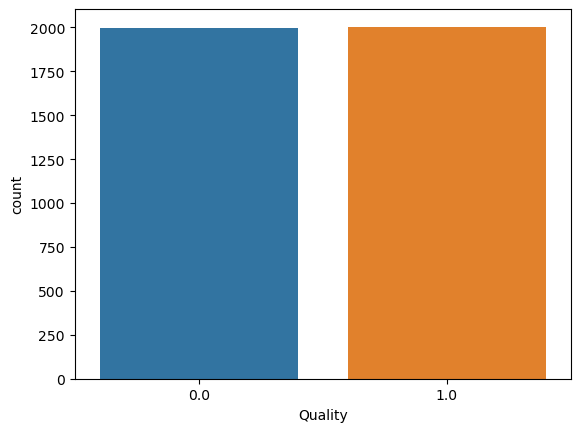

In [15]:
sns.countplot(x='Quality',data=df)

In [16]:
df['Quality'].value_counts()

1.0    2004
0.0    1996
Name: Quality, dtype: int64

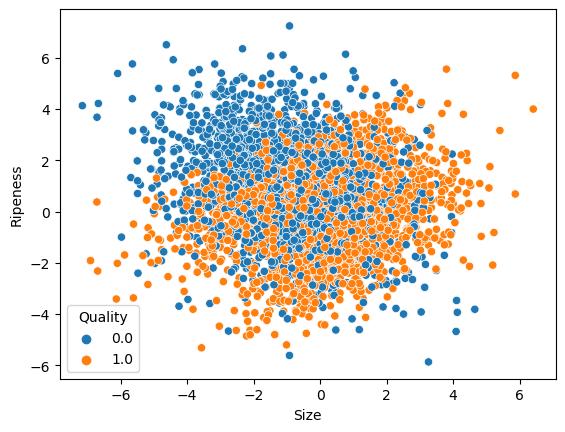

In [17]:
sns.scatterplot(df, x='Size', y='Ripeness', hue='Quality')
plt.show()

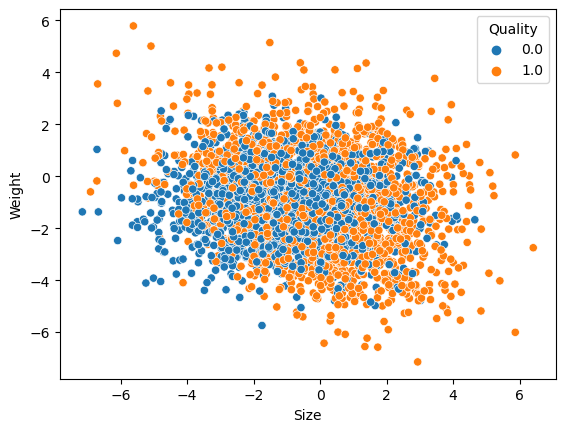

In [18]:
sns.scatterplot(df, x='Size', y='Weight', hue='Quality')
plt.show()

### Split the data

In [21]:
x=df.iloc[:,:-1]
y=df['Quality']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

### Model Building

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [25]:
logreg=LogisticRegression()
svm=SVC()
dt=DecisionTreeClassifier()

In [26]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    
    ac = accuracy_score(ytest,ypred)
    cs = classification_report(ytest,ypred)
    
    print(ac)
    print(cs)
    
    return model

In [27]:
mymodel(logreg)

0.765
              precision    recall  f1-score   support

         0.0       0.80      0.72      0.76       409
         1.0       0.74      0.81      0.77       391

    accuracy                           0.77       800
   macro avg       0.77      0.77      0.76       800
weighted avg       0.77      0.77      0.76       800



LogisticRegression()

In [28]:
train = logreg.score(xtrain,ytrain)
test = logreg.score(xtest,ytest)
print(f'Training score {train} and Testing score {test}')

Training score 0.745625 and Testing score 0.765


In [29]:
mymodel(svm)

0.89875
              precision    recall  f1-score   support

         0.0       0.92      0.88      0.90       409
         1.0       0.88      0.92      0.90       391

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800



SVC()

In [30]:
train = svm.score(xtrain,ytrain)
test = svm.score(xtest,ytest)
print(f'Training score {train} and Testing score {test}')

Training score 0.8975 and Testing score 0.89875


In [31]:
mymodel(dt)

0.84875
              precision    recall  f1-score   support

         0.0       0.86      0.85      0.85       409
         1.0       0.84      0.85      0.85       391

    accuracy                           0.85       800
   macro avg       0.85      0.85      0.85       800
weighted avg       0.85      0.85      0.85       800



DecisionTreeClassifier()

In [32]:
train = dt.score(xtrain,ytrain)
test = dt.score(xtest,ytest)
print(f'Training score {train} and Testing score {test}')

Training score 1.0 and Testing score 0.84875


### Hyper Tunning

### max_depth

In [33]:
for i in range(1,30):
    dt1=DecisionTreeClassifier(max_depth=i)
    dt1.fit(xtrain,ytrain)
    ypred=dt1.predict(xtest)
    
    ac=accuracy_score(ytest,ypred)
    print(f"max_depth {i} and accuracy {ac}")

max_depth 1 and accuracy 0.58375
max_depth 2 and accuracy 0.725
max_depth 3 and accuracy 0.76375
max_depth 4 and accuracy 0.775
max_depth 5 and accuracy 0.7925
max_depth 6 and accuracy 0.82125
max_depth 7 and accuracy 0.81
max_depth 8 and accuracy 0.82625
max_depth 9 and accuracy 0.83125
max_depth 10 and accuracy 0.83625
max_depth 11 and accuracy 0.84
max_depth 12 and accuracy 0.86
max_depth 13 and accuracy 0.83625
max_depth 14 and accuracy 0.85125
max_depth 15 and accuracy 0.84375
max_depth 16 and accuracy 0.85
max_depth 17 and accuracy 0.84
max_depth 18 and accuracy 0.8375
max_depth 19 and accuracy 0.8525
max_depth 20 and accuracy 0.8525
max_depth 21 and accuracy 0.8375
max_depth 22 and accuracy 0.855
max_depth 23 and accuracy 0.84625
max_depth 24 and accuracy 0.85125
max_depth 25 and accuracy 0.85375
max_depth 26 and accuracy 0.85875
max_depth 27 and accuracy 0.8525
max_depth 28 and accuracy 0.85125
max_depth 29 and accuracy 0.8375


In [34]:
dt1 = DecisionTreeClassifier(max_depth=12)
mymodel(dt1)

0.85
              precision    recall  f1-score   support

         0.0       0.86      0.85      0.85       409
         1.0       0.84      0.85      0.85       391

    accuracy                           0.85       800
   macro avg       0.85      0.85      0.85       800
weighted avg       0.85      0.85      0.85       800



DecisionTreeClassifier(max_depth=12)

In [35]:
train=dt1.score(xtrain,ytrain)
test=dt1.score(xtest,ytest)
print(f"Training Score {train} and Testing Score {test}")

Training Score 0.9765625 and Testing Score 0.85


### min_samples_leaf

In [36]:
for i in range(31,60):
    dt2=DecisionTreeClassifier(min_samples_leaf=i)
    dt2.fit(xtrain,ytrain)
    ypred=dt2.predict(xtest)
    
    ac=accuracy_score(ytest,ypred)
    print(f"max_samples_leaf {i} and accuracy {ac}")

max_samples_leaf 31 and accuracy 0.80625
max_samples_leaf 32 and accuracy 0.80625
max_samples_leaf 33 and accuracy 0.80625
max_samples_leaf 34 and accuracy 0.805
max_samples_leaf 35 and accuracy 0.805
max_samples_leaf 36 and accuracy 0.8025
max_samples_leaf 37 and accuracy 0.795
max_samples_leaf 38 and accuracy 0.795
max_samples_leaf 39 and accuracy 0.795
max_samples_leaf 40 and accuracy 0.795
max_samples_leaf 41 and accuracy 0.80125
max_samples_leaf 42 and accuracy 0.80125
max_samples_leaf 43 and accuracy 0.79875
max_samples_leaf 44 and accuracy 0.79625
max_samples_leaf 45 and accuracy 0.795
max_samples_leaf 46 and accuracy 0.795
max_samples_leaf 47 and accuracy 0.7925
max_samples_leaf 48 and accuracy 0.79375
max_samples_leaf 49 and accuracy 0.79375
max_samples_leaf 50 and accuracy 0.7925
max_samples_leaf 51 and accuracy 0.7975
max_samples_leaf 52 and accuracy 0.80125
max_samples_leaf 53 and accuracy 0.80125
max_samples_leaf 54 and accuracy 0.80125
max_samples_leaf 55 and accuracy 0.8

In [37]:
dt3 = DecisionTreeClassifier(min_samples_leaf=33)
mymodel(dt3)

0.80625
              precision    recall  f1-score   support

         0.0       0.82      0.80      0.81       409
         1.0       0.79      0.82      0.80       391

    accuracy                           0.81       800
   macro avg       0.81      0.81      0.81       800
weighted avg       0.81      0.81      0.81       800



DecisionTreeClassifier(min_samples_leaf=33)

In [38]:
train=dt3.score(xtrain,ytrain)
test=dt3.score(xtest,ytest)
print(f"Training Score {train} and Testing Score {test}")

Training Score 0.849375 and Testing Score 0.80625


### min_samples_split

In [39]:
for i in range(100,130):
    dt4=DecisionTreeClassifier(min_samples_split=i)
    dt4.fit(xtrain,ytrain)
    ypred=dt4.predict(xtest)
    
    ac=accuracy_score(ytest,ypred)
    print(f"max_samples_split {i} and accuracy {ac}")

max_samples_split 100 and accuracy 0.8075
max_samples_split 101 and accuracy 0.8075
max_samples_split 102 and accuracy 0.8075
max_samples_split 103 and accuracy 0.80375
max_samples_split 104 and accuracy 0.80375
max_samples_split 105 and accuracy 0.80375
max_samples_split 106 and accuracy 0.80375
max_samples_split 107 and accuracy 0.80875
max_samples_split 108 and accuracy 0.80875
max_samples_split 109 and accuracy 0.80875
max_samples_split 110 and accuracy 0.80875
max_samples_split 111 and accuracy 0.80875
max_samples_split 112 and accuracy 0.80875
max_samples_split 113 and accuracy 0.80875
max_samples_split 114 and accuracy 0.80875
max_samples_split 115 and accuracy 0.81
max_samples_split 116 and accuracy 0.81
max_samples_split 117 and accuracy 0.81
max_samples_split 118 and accuracy 0.81
max_samples_split 119 and accuracy 0.81
max_samples_split 120 and accuracy 0.81
max_samples_split 121 and accuracy 0.81
max_samples_split 122 and accuracy 0.81
max_samples_split 123 and accuracy 0.8

In [40]:
dt5 = DecisionTreeClassifier(min_samples_split=122)
mymodel(dt5)

0.81
              precision    recall  f1-score   support

         0.0       0.85      0.76      0.80       409
         1.0       0.77      0.86      0.82       391

    accuracy                           0.81       800
   macro avg       0.81      0.81      0.81       800
weighted avg       0.81      0.81      0.81       800



DecisionTreeClassifier(min_samples_split=122)

In [41]:
train=dt5.score(xtrain,ytrain)
test=dt5.score(xtest,ytest)
print(f"Training Score {train} and Testing Score {test}")

Training Score 0.845 and Testing Score 0.81


### Bagging

In [42]:
from sklearn.ensemble import BaggingClassifier

In [43]:
bg=BaggingClassifier(LogisticRegression())
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.80      0.72      0.76       409
         1.0       0.74      0.81      0.77       391

    accuracy                           0.77       800
   macro avg       0.77      0.77      0.76       800
weighted avg       0.77      0.77      0.76       800



In [44]:
bg=BaggingClassifier(SVC())
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.91      0.88      0.90       409
         1.0       0.88      0.91      0.89       391

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.89       800
weighted avg       0.90      0.90      0.90       800



In [45]:
bg=BaggingClassifier(DecisionTreeClassifier())
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.88      0.87      0.87       409
         1.0       0.87      0.87      0.87       391

    accuracy                           0.87       800
   macro avg       0.87      0.87      0.87       800
weighted avg       0.87      0.87      0.87       800



In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rf = RandomForestClassifier()
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90       409
         1.0       0.89      0.91      0.90       391

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800



### Boosting

In [48]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [49]:
ad = AdaBoostClassifier()
ad.fit(xtrain,ytrain)
ypred=ad.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.79      0.78      0.79       409
         1.0       0.77      0.79      0.78       391

    accuracy                           0.78       800
   macro avg       0.78      0.78      0.78       800
weighted avg       0.78      0.78      0.78       800



In [50]:
gb = GradientBoostingClassifier()
gb.fit(xtrain,ytrain)
ypred=gb.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.89      0.85      0.87       409
         1.0       0.85      0.88      0.87       391

    accuracy                           0.87       800
   macro avg       0.87      0.87      0.87       800
weighted avg       0.87      0.87      0.87       800



In [51]:
from xgboost import XGBClassifier

In [52]:
xgb = XGBClassifier()
xgb.fit(xtrain,ytrain)
ypred=xgb.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91       409
         1.0       0.90      0.91      0.91       391

    accuracy                           0.91       800
   macro avg       0.91      0.91      0.91       800
weighted avg       0.91      0.91      0.91       800



### Conclusion